Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2025 <br>

<h1><center>Tarea 1</center></h1>

Profesor: Marcelo Mendoza<br>
Fecha de entrega: 07 de abril 2025



## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es INDIVIDUAL.


**NOMBRE ESTUDIANTE:** Benjamin Ruiz Salvatierra 

## Librerías

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar

## Introducción

El dataset incluye variables cuantitativas y cualitativas sobre tipos de vinos.
A continuación, se presenta una breve descripción de cada atributo:

* type: Tipo de vino

* fixed acidity: Cantidad de ácidos poco volátiles

* volatile acidity: Cantidad de ácidos volátiles

* citric acid: Cantidad de ácido cítrico

* residual sugar: Cantidad de azúcar residual

* chlorides: Cantidad de cloruros

* free sulfur dioxide: Cantidad de dióxido de azufre libre

* total sulfur dioxide: Cantidad total de dióxido de azufre

* density: Densidad del vino

* pH: nivel de acidez o alcalinidad

* sulphates: Cantidad de sulfatos

* alcohol: Cantidad de alcohol

* quality: calidad del vino



## Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (2 puntos)

Cargue el dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos? De ser así, mencione el número de casos por variable y luego elimine todas filas que tengan a lo menos un valor nulo.


RESPUESTA:

In [14]:
# Cargamos los datos de los vinos
df_vinos = pd.read_csv('Dataset_tarea1.csv')

In [15]:
df_vinos.info() # Vemos la información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [16]:
df_vinos.isnull().sum() # Comprobamos si hay valores nulos

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Gracias al método de `info()` podemos ver que el dataset posee 6.497 filas y 13 columnas, además de que al utilizar el método `isnull().sum()` podemos ver que existen 7 columnas con datos nulos, las cuales son `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `pH` y `sulphates`, habiendo un total de 38 datos nulos.

In [17]:
df_vinos.dropna(inplace=True) # Eliminamos los valores nulos

In [18]:
sum(df_vinos.isnull().sum()) # Comprobamos que no hay valores nulos

0

In [ ]:
df_vinos.info() # Vemos la información del dataframe después de eliminar los nulos

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


Podemos ver que luego de la limpieza de datos nulos, quedó una cantidad final de 6.463 filas y 13 columnas.

### 1.2 Análisis descriptivo (12 puntos)

Mediante gráficos y medidas numéricas apropiadas, describa el comportamiento de cada variable del dataset.

Luego, presente gráficos que permitan relacionar las siguientes variables:

* "density" con "fixed acidity"
* "quality" con "alcohol"

Analice todos los resultados obtenidos y comente.

RESPUESTA:

In [22]:
df_vinos.head() # Vemos la información del dataframe

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


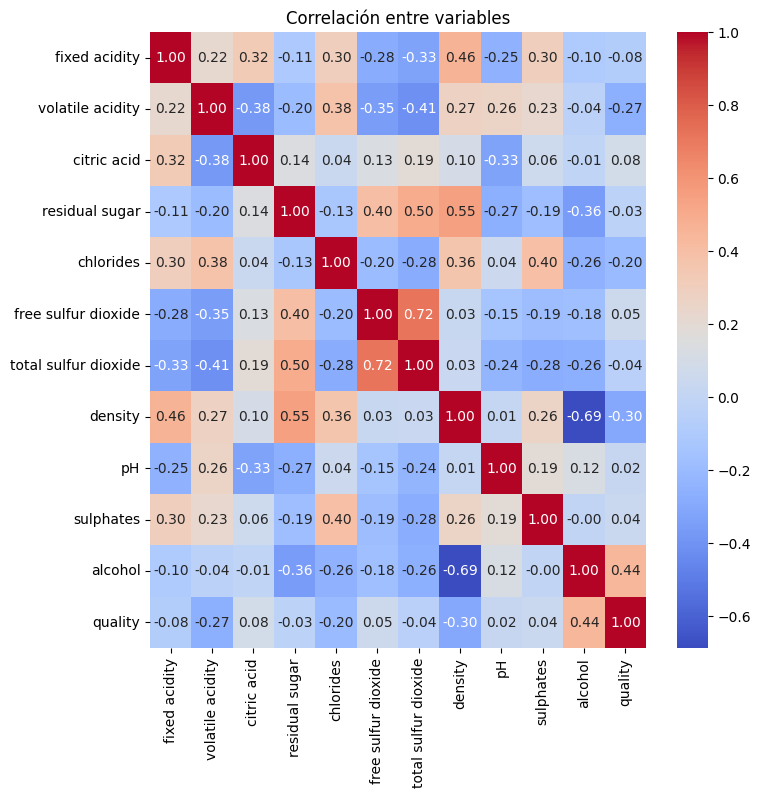

In [33]:
# Visualizamos la correlación entre las variables sin considerar la columna 'type'
df_vinos_sin_type = df_vinos.drop(columns=['type'])
plt.figure(figsize=(8, 8))
sns.heatmap(df_vinos_sin_type.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables')
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_14856\3979945231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_vinos, x='type', palette='Set2')


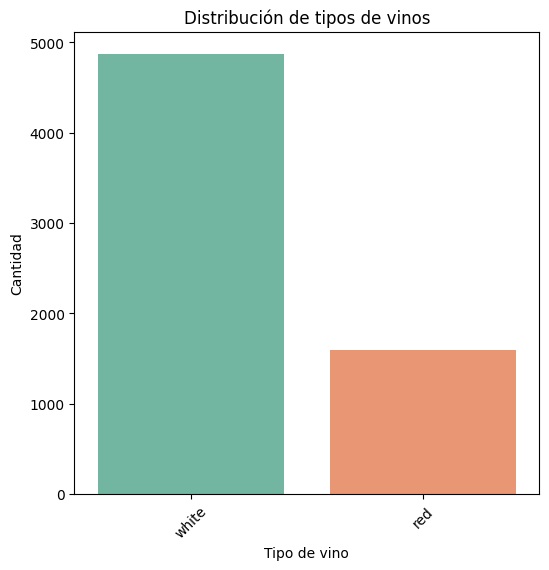

In [29]:
# Graficamos la distribución de tipos de vinos
plt.figure(figsize=(6, 6))
sns.countplot(data=df_vinos, x='type', palette='Set2')
plt.title('Distribución de tipos de vinos')
plt.xlabel('Tipo de vino')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### 1.3 Normalizar datos (3 puntos)

Realice un proceso de normalización, utilizando MinMaxScaler. No considere las variables quality y type.

Explique por qué es útil realizar esta normalización.

RESPUESTA:

### 1.4 Correlación (3 puntos)

Construya una matriz de correlación. Identifique las variables que presentan una alta relación lineal (superior a 0.6 o inferior a -0.6).

**Observación**

Para este análisis solo trabaje con las variables normalizadas en el paso anterior.

RESPUESTA:

## Parte 2: Reducción de dimensionalidad PCA (10 puntos)

**En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza explicada en función del número de componentes. Analice los resultados obtenidos.

RESPUESTA:

### 2.2 Retener 90% de la varianza (3 puntos)

Aplique PCA para retener un 90% de la varianza del conjunto de datos normalizado del punto 1.3. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

### 2.3 Reducir dimensionalidad a n=2 (2 puntos)

Considerando el dataset normalizado del punto 1.3, aplique PCA con un número de componentes igual a 2 . Determine la proporción de varianza explicada.

RESPUESTA:

## Parte 3: Detección de outliers (10 puntos)

**En esta tercera parte se debe evaluar la existencia de outliers. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza)**.

### 3.1 Graficar histograma LOF (4 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 8 y use como métrica la distancia euclidiana. Analice los resultados obtenidos.

RESPUESTA:

### 3.2 Identificar datos atípicos (6 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1.5, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

## Parte 4: Visualización T-SNE y UMAP (20 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

### 4.1 T-SNE (6 puntos)

Describa las principales características del modelo T-SNE.

Ajuste un modelo de 2 componentes mediante T-SNE. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. ¿Reconoce algún patrón?


RESPUESTA:

### 4.2 UMAP (6 puntos)

Describa las principales características del modelo UMAP.

Ajuste un modelo 2 componentes mediante UMAP. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. Compare con el gráfico obtenido al trabajar con TSNE.

RESPUESTA:

### 4.3 TSNE y UMAP con labels (8 puntos)

Sobre los gráficos obtenidos en los puntos 4.1 (T-SNE) y 4.2 (UMAP), incorpore la variable "type" del dataset original de tal manera que se pueda observar a qué tipo de vino corresponde cada punto del gráfico. ¿Se observa algún patrón?

Luego, repita el mismo procedimiento, pero trabajando con la variable "quality". Es decir, cada punto en el gráfico debe reflejar la calidad de vino.

Analice los resultados y formule una conclusión.

RESPUESTA: